In [6]:
!pip install tensorflow==2.16.1


  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
  Using cached keras-3.11.3-py3-none-any.whl.metadata (5.9 kB)
Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl (2.1 kB)
Using cached keras-3.11.3-py3-none-any.whl (1.4 MB)


In [1]:
import tensorflow as tf
print(tf.__version__)


2.16.1


In [2]:
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Training samples: {x_train.shape[0]}, Testing samples: {x_test.shape[0]}")


Training samples: 60000, Testing samples: 10000


In [6]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# CNN requires 4D shape (samples, 28, 28, 1)
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# MLP requires flattened 2D input
x_train_mlp = x_train.reshape(-1, 784)
x_test_mlp = x_test.reshape(-1, 784)

# One-hot encode labels
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)


In [7]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(x_train_cnn)

In [8]:
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
])

C:\Users\jinda\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
mlp_model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\jinda\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
lr_scheduler = callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=2,
    min_lr=1e-5,
    verbose=1
)

In [11]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
print("\n🧠 Training CNN Model with Data Augmentation...")
history_cnn = cnn_model.fit(
    datagen.flow(x_train_cnn, y_train_cat, batch_size=64),
    epochs=15,
    validation_data=(x_test_cnn, y_test_cat),
    callbacks=[lr_scheduler],
    verbose=1
)

print("\n⚙️ Training MLP Model...")
history_mlp = mlp_model.fit(
    x_train_mlp, y_train_cat,
    epochs=15,
    batch_size=128,
    validation_data=(x_test_mlp, y_test_cat),
    verbose=1
)


🧠 Training CNN Model with Data Augmentation...


C:\Users\jinda\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 105s 103ms/step - accuracy: 0.8848 - loss: 0.3669 - val_accuracy: 0.9825 - val_loss: 0.0551 - learning_rate: 0.0010
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 98s 105ms/step - accuracy: 0.9655 - loss: 0.1156 - val_accuracy: 0.9885 - val_loss: 0.0337 - learning_rate: 0.0010
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 100s 106ms/step - accuracy: 0.9741 - loss: 0.0891 - val_accuracy: 0.9903 - val_loss: 0.0267 - learning_rate: 0.0010
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 98s 105ms/step - accuracy: 0.9782 - loss: 0.0734 - val_accuracy: 0.9898 - val_loss: 0.0314 - learning_rate: 0.0010
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 101s 107ms/step - accuracy: 0.9817 - loss: 0.0647 - val_accuracy: 0.9923 - val_loss: 0.0220 - learning_rate: 0.0010
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 96s 103ms/step - accuracy: 0.9838 - loss: 0.0555 - val_accuracy: 0.9917 - val_loss: 0.0245 - learning_rate: 0.0010
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 93s 99ms/step - accuracy: 0

In [13]:
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test_cnn, y_test_cat)
mlp_test_loss, mlp_test_acc = mlp_model.evaluate(x_test_mlp, y_test_cat)

print(f"\n✅ CNN Test Accuracy: {cnn_test_acc * 100:.2f}%")
print(f"✅ MLP Test Accuracy: {mlp_test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9956 - loss: 0.0135
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9819 - loss: 0.0745

✅ CNN Test Accuracy: 99.56%
✅ MLP Test Accuracy: 98.19%


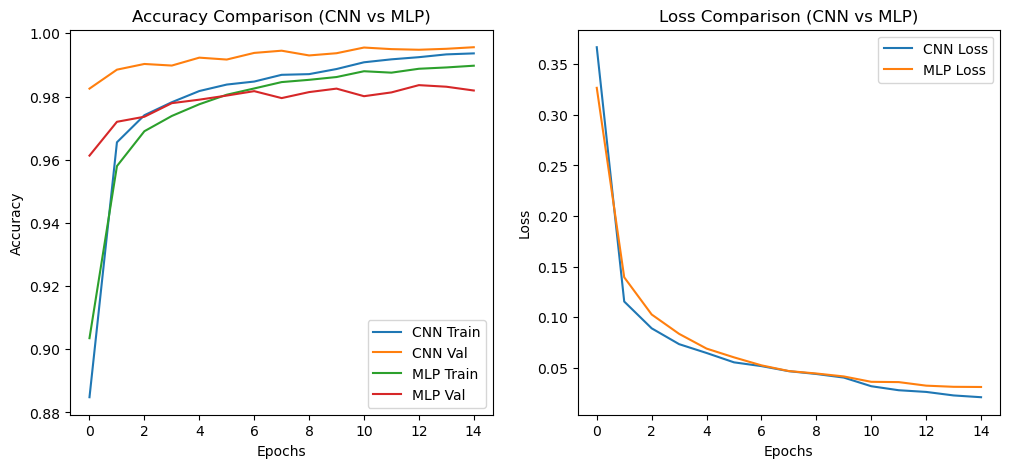

In [14]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='CNN Train')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Val')
plt.plot(history_mlp.history['accuracy'], label='MLP Train')
plt.plot(history_mlp.history['val_accuracy'], label='MLP Val')
plt.title('Accuracy Comparison (CNN vs MLP)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='CNN Loss')
plt.plot(history_mlp.history['loss'], label='MLP Loss')
plt.title('Loss Comparison (CNN vs MLP)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


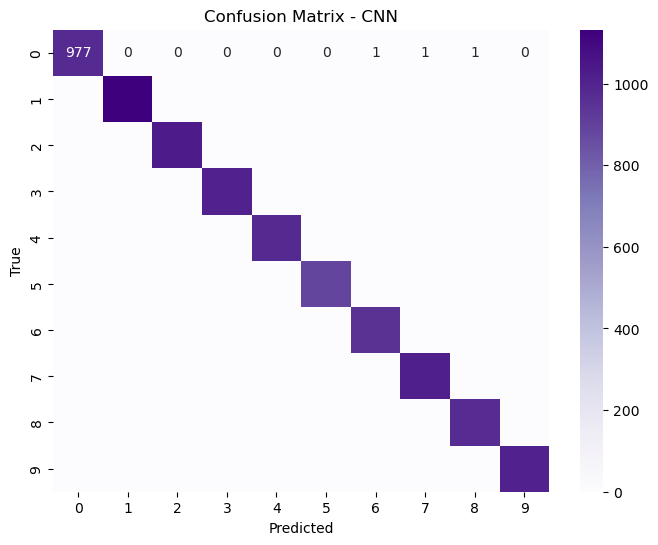

In [15]:
y_pred_cnn = cnn_model.predict(x_test_cnn)
y_pred_classes_cnn = np.argmax(y_pred_cnn, axis=1)

cm = confusion_matrix(y_test, y_pred_classes_cnn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - CNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step



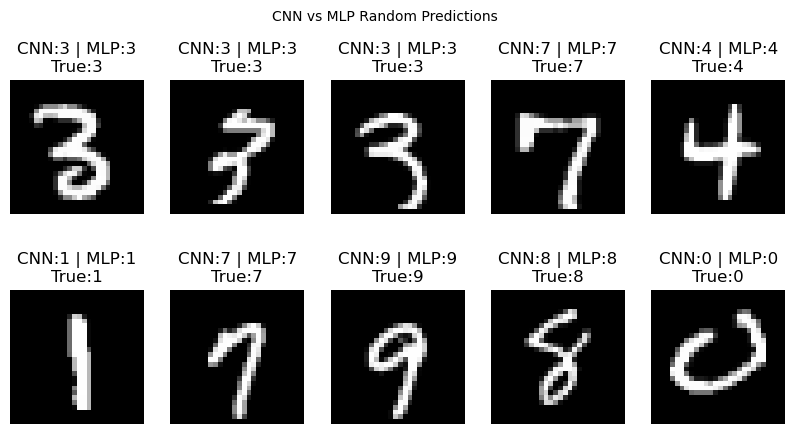

In [24]:
plt.figure(figsize=(10, 5))
for i in range(10):
    idx = np.random.randint(0, len(x_test))
    img = x_test[idx].reshape(1, 28, 28, 1)
    cnn_pred = np.argmax(cnn_model.predict(img))
    mlp_pred = np.argmax(mlp_model.predict(x_test[idx].reshape(1, 784)))
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"CNN:{cnn_pred} | MLP:{mlp_pred}\nTrue:{y_test[idx]}")
    plt.axis('off')
plt.suptitle("CNN vs MLP Random Predictions", fontsize=10)
print()
plt.show()